The purpose of this notebook is to extend off of single_source_over_LST.ipynb, showing how the same code can be used to follow the entire sky.

Why is this notebook still alive, you ask? I want to run some additional performance tests, to verify that I am getting my money's worth out of the purported upgrade from the literal approach to the interpolation approach.

"Note: the code in this notebook has to be redone slightly since we changed the format in which sky_over_time returns."

In [1]:
%matplotlib inline
import skyflux as sf

Missing flux value for: GLEAM J202818-254302 at frequency: 204 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 212 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 220 MHz.
Missing flux value for: GLEAM J202818-254302 at frequency: 227 MHz.
Missing spectral index for: GLEAM J202818-254302


//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.8/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

In [3]:
# Set up a healpy interpolator

#! I think we will have to revisit these values to expand the healpy
    # interpolator, once we have tested it out at least once.
    # For example: is our current interpolator set-up covering the entire sky?

nside = 128

theta, phi = hp.pix2ang(nside,np.arange(12 * nside * nside))

list_az = phi
list_alt = np.pi / 2 - theta
#J = sf.stokes.spline_beam_func(151e6, alt, az)

# Not 100% sure about this lack of LST arg
J = sf.stokes.create_J(az=list_az, alt=list_alt, nu=151e6, radians=True)
J_abs = np.abs(J)

In [12]:
# test visibility over time function
# we are expecting an array of 4x1 complex vectors

#assert False, "this cell is currently too dangerous to run"

cold_patch = sf.vis.sources_over_time(88, 121, sf.catalog.obj_catalog[:100],
                                        start=0, end=2/3 * np.pi, interval=np.pi / 72, nu=151e6)

In [6]:
print(cold_patch)

[[0
  array([-0.25137158-1.13664027j, -0.01933784+0.08462342j,
        0.00338785-0.01231353j,  0.00190604-0.0016301j ])]
 [0.04363323129985824
  array([-0.98404276-0.42802184j,  0.02867216+0.0764414j ,
        0.01365002+0.05285j   ,  0.00124125-0.00379375j])]
 [0.08726646259971647
  array([-0.74173514+0.58738482j,  0.05458578+0.00373908j,
        0.07860657+0.0325346j , -0.00222575-0.00432265j])]
 [0.1308996938995747
  array([ 0.19375762+8.60793629e-01j, -0.01740829-8.67695749e-03j,
        0.05573608-3.76102665e-02j, -0.0022305 +5.60393820e-04j])]
 [0.17453292519943295
  array([ 0.73165898+0.33050763j, -0.00310038+0.0224577j ,
        0.01307849-0.03992254j,  0.00074684+0.00044316j])]
 [0.2181661564992912
  array([ 8.71808062e-01-0.36248743j, -3.11413912e-02-0.02282542j,
       -1.14225202e-02-0.01297848j, -1.58253325e-04-0.00089087j])]
 [0.2617993877991494
  array([ 0.18689522-1.20673126e+00j, -0.0214077 +5.83838006e-02j,
       -0.01677055+8.07609300e-03j,  0.00089287+6.15199110e-

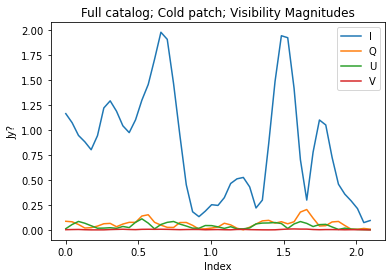

In [10]:
t = cold_patch[:, 0]
I = np.array([v[1][0] for v in cold_patch])
Q = np.array([v[1][1] for v in cold_patch])
U = np.array([v[1][2] for v in cold_patch])
V = np.array([v[1][3] for v in cold_patch])

plt.plot(t, np.abs(I), label="I")
plt.plot(t, np.abs(Q), label="Q")
plt.plot(t, np.abs(U), label="U")
plt.plot(t, np.abs(V), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Full catalog; Cold patch; Visibility Magnitudes")

plt.legend()

plt.show()

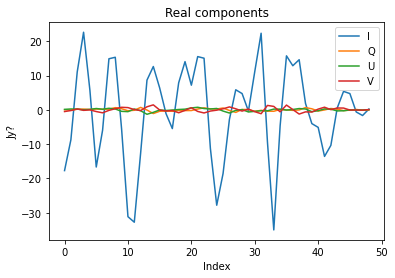

In [5]:
plt.plot(np.real(cold_patch[:, 0]), label="I")
plt.plot(np.real(cold_patch[:, 1]), label="Q")
plt.plot(np.real(cold_patch[:, 2]), label="U")
plt.plot(np.real(cold_patch[:, 3]), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Full catalog; Cold patch; Real Components")

plt.legend()

plt.show()

In [ ]:
plt.plot(np.imag(cold_patch[:, 0]), label="I")
plt.plot(np.imag(cold_patch[:, 1]), label="Q")
plt.plot(np.imag(cold_patch[:, 2]), label="U")
plt.plot(np.imag(cold_patch[:, 3]), label="V")

plt.xlabel("Index")
plt.ylabel("Jy?")
plt.title("Full catalog; Cold patch; Imaginary Components")

plt.legend()

plt.show()